In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("Expanded_data_with_more_features.csv")
print(df.head())


   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [7]:
df.describe()
 



,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [13]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [19]:
df= df.drop("Unnamed: 0", axis=1)


In [18]:
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


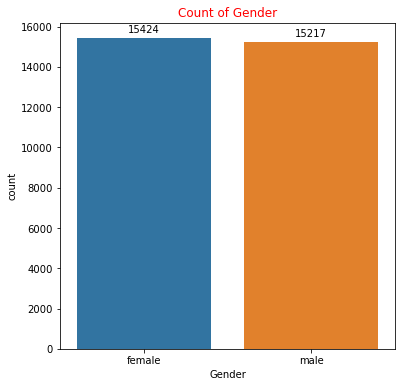

In [54]:
plt.figure(figsize=(6,6))
plt.title("Count of Gender",color="red")
ax=sns.countplot(data=df,x="Gender")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()


In [ ]:
#from the above chat we can see that Female students  are more than male students

In [34]:
group=df.groupby("ParentEduc").agg({"MathScore":"mean","WritingScore":"mean","ReadingScore":"mean"})
print(group)

                    MathScore  WritingScore  ReadingScore
ParentEduc                                               
associate's degree  68.365586     70.299099     71.124324
bachelor's degree   70.466627     73.331069     73.062020
high school         64.435731     65.421136     67.213997
master's degree     72.336134     76.356896     75.832921
some college        66.390472     68.501432     69.179708
some high school    62.584013     63.632409     65.510785


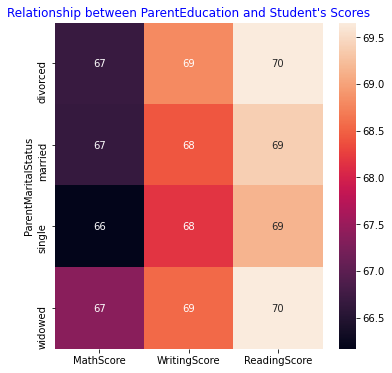

In [52]:
plt.figure(figsize=(6,6))
plt.title("Relationship between ParentEducation and Student's Scores",color="blue")

ax=sns.heatmap(group, annot=group.values)
plt.show()

In [ ]:
# Based on the above chart we can see that parent's Education have a good impact on their children score

In [47]:
group1=df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","WritingScore":"mean","ReadingScore":"mean"})
print(group1)

                     MathScore  WritingScore  ReadingScore
ParentMaritalStatus                                       
divorced             66.691197     68.799146     69.655011
married              66.657326     68.420981     69.389575
single               66.165704     68.174440     69.157250
widowed              67.368866     68.563452     69.651438


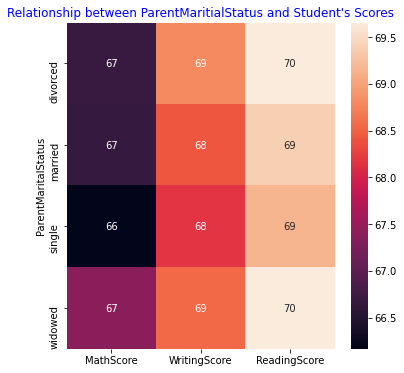

In [51]:
plt.figure(figsize=(6,6))
plt.title("Relationship between ParentMaritialStatus and Student's Scores",color="blue")
ax=sns.heatmap(group1, annot=group1.values)
plt.show()

In [49]:
# From the above chart we can conclude that ParenMaritialStatus doesn't have any impact on the student's scores

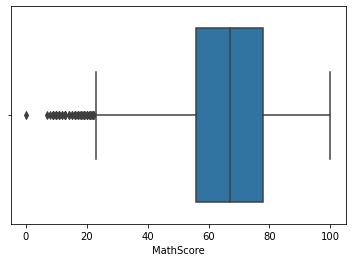

In [57]:
sns.boxplot(data=df,x="MathScore")
plt.show()

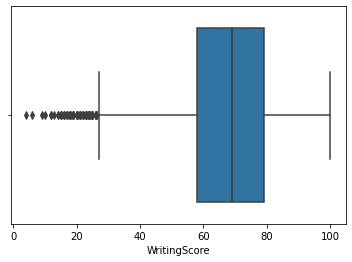

In [58]:
sns.boxplot(data=df,x="WritingScore")
plt.show()

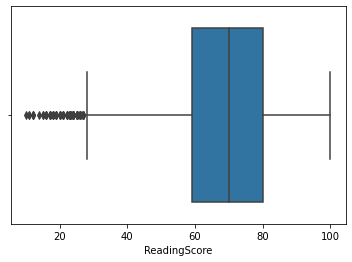

In [59]:
sns.boxplot(data=df,x="ReadingScore")
plt.show()

# Distribution of Ethnic group

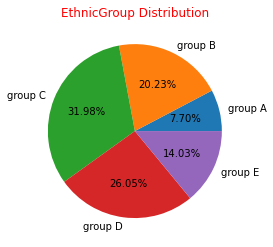

In [71]:
groupA=df.loc[(df["EthnicGroup"]=="group A")].count()
groupB=df.loc[(df["EthnicGroup"]=="group B")].count()
groupC=df.loc[(df["EthnicGroup"]=="group C")].count()
groupD=df.loc[(df["EthnicGroup"]=="group D")].count()
groupE=df.loc[(df["EthnicGroup"]=="group E")].count()

l=["group A","group B","group C","group D","group E"]
mylis=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.title("EthnicGroup Distribution",color="red")
plt.pie(mylis, labels=l,autopct="%1.2f%%")
plt.show()

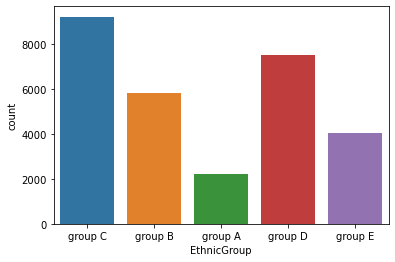

In [76]:
a=sns.countplot(data=df,x="EthnicGroup")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.show()